In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("clean_data/gdp.csv")
series = data.iloc[171]

values = list(series.drop(["Unnamed: 0", "Country Name", "Country Code", "Unnamed: 67"]))
X, y = [], []

for indx, val in enumerate(values):
    if pd.isna(val): continue
    y.append(np.log(val))
    # y.append(val)
    X.append(indx)

if np.min(y) <= 0:
    for i in range(len(y)):
        if y[i] <= 0: y[i] = 0.0001

X, X_val = X[-20:] + X[:-10], X[-20:-10]
y, y_val = y[-20:] + y[:-10], y[-20:-10]

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
X_val = np.array(X_val).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [16]:
line_x = np.arange(0, 64).reshape(-1, 1)
line_y = regressor.predict(line_x)

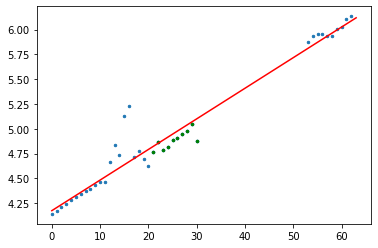

In [17]:
# print(X)
plt.scatter(X, y, s=6)
plt.scatter(X_val, y_val, color="green", s=6)
plt.plot(line_x, line_y, color="red")
plt.show()

In [18]:
plt.close()

In [56]:
data = pd.DataFrame({"Jahr": X[:, 0], "BIP pro Kopf (tausend US$ - log)": y[:, 0]}, np.arange(51))
data.head(10)

,Jahr,BIP pro Kopf (tausend US$ - log)
0,21,4.768955
1,22,4.868419
2,23,4.783141
3,24,4.818442
4,25,4.884127
5,26,4.902763
6,27,4.949269
7,28,4.976757
8,29,5.045175
9,30,4.875375


In [48]:
plt.close()

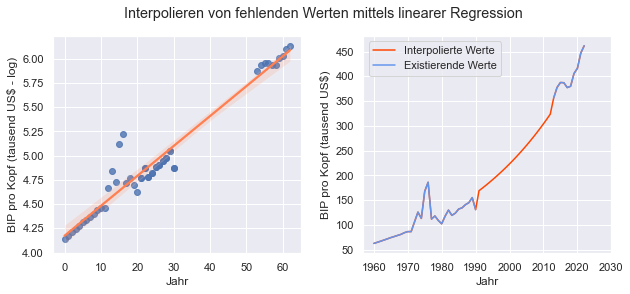

In [69]:
f, ax = plt.subplots(1, 2)
f.set_figwidth(10)
f.suptitle("Interpolieren von fehlenden Werten mittels linearer Regression")
f.subplots_adjust(wspace=0.25)

sns.set_theme(style="darkgrid")
sns.regplot(x="Jahr", y="BIP pro Kopf (tausend US$ - log)", data=data, ci=99.999999999, line_kws=dict(color="coral"), n_boot=999, ax=ax[0])

merged_values = []

for indx, val in enumerate(values):
    if pd.isna(val):
        value = np.exp(line_y[indx][0])
    else:
        value = val
    
    # optional, dependent in indicator
    if value < 0: value = 0.1
    # if value > 100: value = 100
    # if value < 0: continue
    merged_values.append(value)

plt.sca(ax[1])
plt.plot(merged_values, color="orangered", label="Interpolierte Werte")
plt.plot(values, color="cornflowerblue", label="Existierende Werte")
x_location, x_label = plt.xticks()
x_label = [1950 + i*10 for i, _ in enumerate(x_label)]
x_location = list(x_location)
x_location.pop(0)
x_label.pop(0)
plt.xticks(x_location, x_label)
plt.xlabel("Jahr")
plt.ylabel("BIP pro Kopf (tausend US$)")
plt.legend()
plt.savefig("interpolation_regression_plot.png", dpi=300)